In [1]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.util import img_as_float
from skimage import io, util, color
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np

and define a convenience function to show two images side by side:

In [2]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

## Image morphology on a single object

An image, **lego_5.png** of a lego brick can be used to test some of the basic functions. 
### Exercise 1

We will start by computing a binary image from the lego image:

- Read the image into **im_org**.
- Convert the image to gray scale. 
- Find a threshold using *Otsu's method*.
- Apply the treshold and generate a binary image **bin_img**.
- Visualize the image using `plot_comparison(im_org, bin_img, 'Binary image')`

As ncan be seen, the lego brick is not *segmented* perfectly. There are holes in the segmentation. Let us see if what we can do.

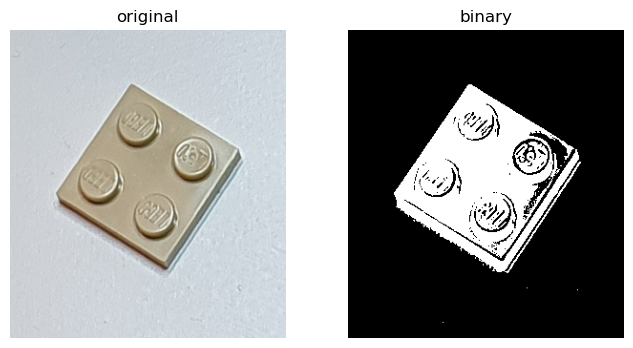

In [3]:
lego_image= io.imread("data/lego_5.png")
lego_gray = color.rgb2gray(lego_image)
threshold_value = threshold_otsu(lego_gray)
bin_img = threshold_value  >=  lego_gray
plot_comparison(lego_image, bin_img, 'binary')

As ncan be seen, the lego brick is not *segmented* perfectly. There are holes in the segmentation. Let us see if what we can do.
### Exercise 2

We will start by creating a *structuring element*. In scikit-image they are called *footprint*. A disk shaped footprint can be created by:

In [4]:
footprint = disk(4)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0]]


The morphological operation **erosion** can remove small objects, separate objects and make objects smaller. Try it on the binary lego image:

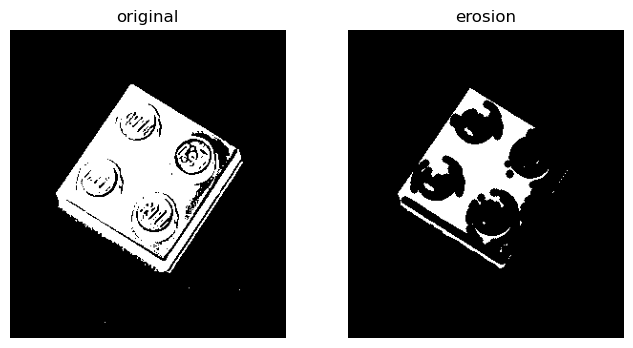

In [5]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

### Exercise 4

The morphological operation **opening** removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

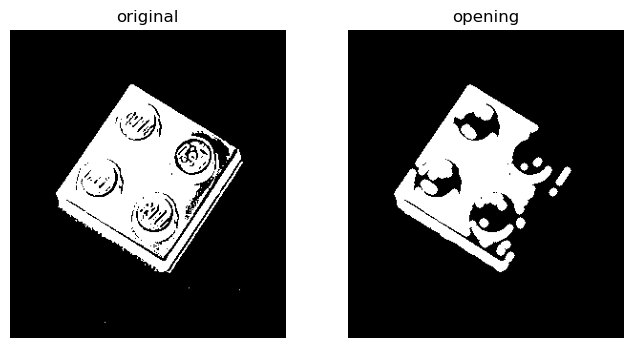

In [6]:
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

### Exercise 5

The morphological operation **closing** closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image:

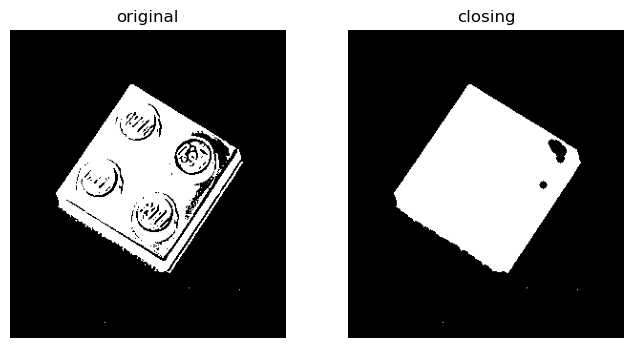

In [7]:
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

## Object outline

It can be useful to compute the outline of an object both to measure the perimeter but also to see if it contains holes or other types of noise. Start by defining an outline function:

In [8]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    print(outline)
    return outline

### Exercise 6

Compute the outline of the binary image of the lego brick. What do you observe?

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


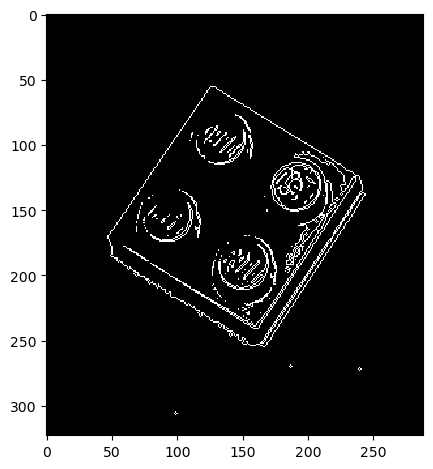

In [9]:
outline = compute_outline(bin_img)
io.imshow(outline)

### Exercise 7

Try the following:

- Do an *opening* with a disk of size 1 on the binary lego image.
- Do a *closing* with a disk of size 15 on the result of the opening.
- Compute the outline and visualize it.

What do you observe and why does the result look like that?

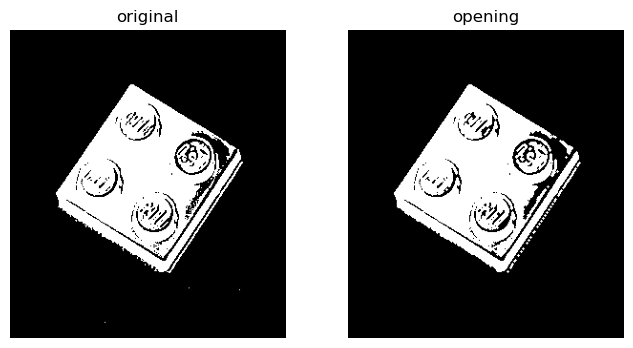

In [10]:
footprint = disk(1)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

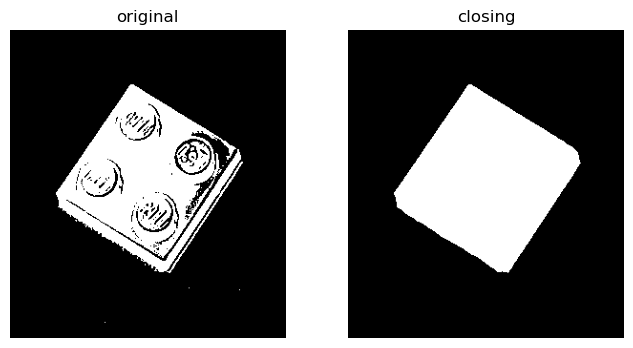

In [11]:
footprint = disk(15)
closed = closing(opened, footprint)
plot_comparison(bin_img, closed, 'closing')

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


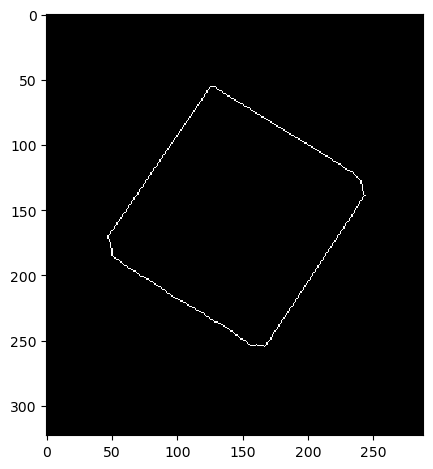

In [12]:
outline = compute_outline(closed)
io.imshow(outline)

## Morphology on multiple objects

Let us try to do some analysis on images with multiple objects.

### Exercise 8

Start by:
- reading the **lego_7.png** image and convert it to gray scale.
- Compute a treshold using *Otsu's method* and apply it to the image.
- Show the binary image together with the original.
- Compute the outline of the binary image and show it with the binary image.

What do you observe?

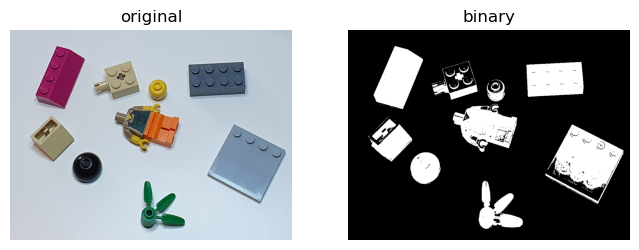

In [13]:
lego_image= io.imread("data/lego_3.png")
lego_gray = color.rgb2gray(lego_image)
threshold_value = threshold_otsu(lego_gray)
bin_img = threshold_value  >=  lego_gray
plot_comparison(lego_image, bin_img, 'binary')

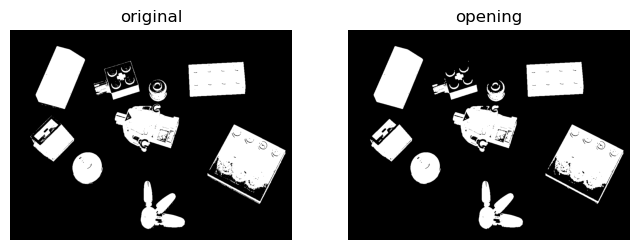

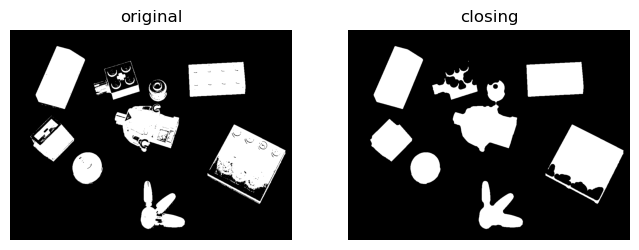

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


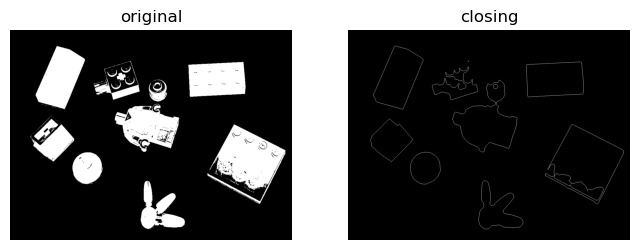

In [14]:
footprint = disk(1)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

footprint = disk(9)
closed = closing(opened, footprint)
plot_comparison(bin_img, closed, 'closing')

outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'closing')

### Exercise 9

We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the *closing* operations and find out which size of footprint that gives the desired result?

## Morphology on multiple connected objects

Morphology is a strong tool that can be used to clean images and separate connected objects. In image **lego_9.png** some lego bricks are touching. We would like to see if we can separate them.

### Exercise 11

Start by:
- reading the **lego_9.png** image and convert it to gray scale.
- Compute a treshold using *Otsu's method* and apply it to the image.
- Show the binary image together with the original.
- Compute the outline of the binary image and show it with the binary image.

What do you observe?

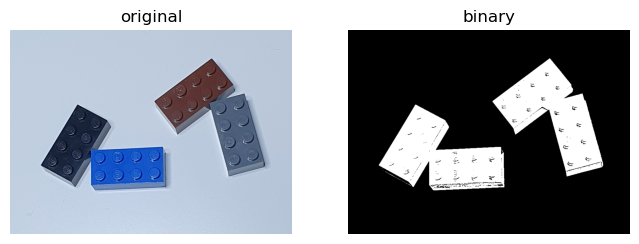

In [15]:
lego_image= io.imread("data/lego_9.png")
lego_gray = color.rgb2gray(lego_image)
threshold_value = threshold_otsu(lego_gray)
bin_img = threshold_value  >=  lego_gray
plot_comparison(lego_image, bin_img, 'binary')

### Exercise 12

Let us start by trying to remove the noise holes inside the lego bricks. Do that with an *closing* and find a good footprint size. Compute the outline and see what you observe?


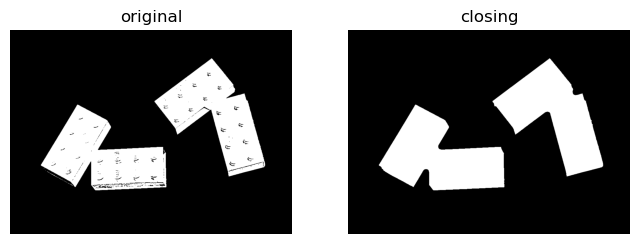

In [16]:
footprint = disk(10)
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


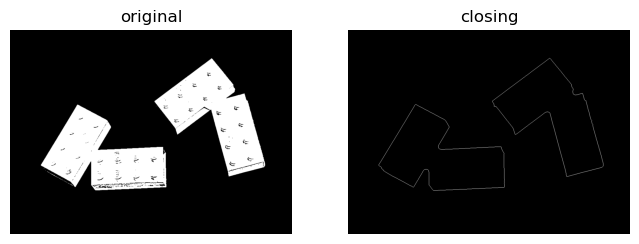

In [17]:
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'closing')

### Exercise 13

Now we will try to separate the objects. Try using a *erosion* on the image that you repaired in exercise 12. You should probably use a rather large footprint. How large does it need to be in order to split the objects?

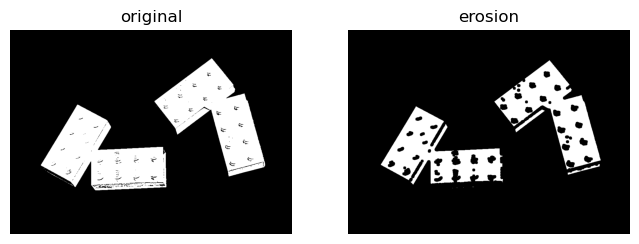

In [18]:
footprint = disk(5)
erosion_img = erosion(bin_img, footprint)
plot_comparison(bin_img, erosion_img, 'erosion')

### Exercise 14

The objects lost a lot of size in the previous step. Try to use *dilate* to make them larger. How large can you make them before they start touching?

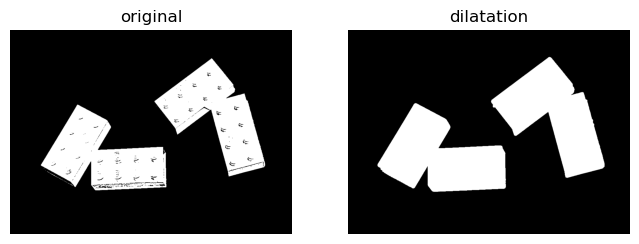

In [19]:
footprint = disk(5)
dilation_img = dilation(bin_img, footprint)
plot_comparison(bin_img, dilation_img, 'dilatation')

## Puzzle piece analysis

We would like to make a program that can help solving puzzles. The first task is to outline each piece. A photo, **puzzle_pieces.png** is provided. 

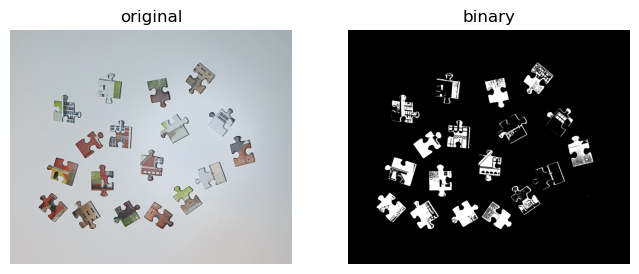

In [20]:
puzzle = io.imread("data/puzzle_pieces.png")
puzzle_gray = color.rgb2gray(puzzle)
threshold_value = threshold_otsu(puzzle_gray)
bin_img = threshold_value  >=  puzzle_gray
plot_comparison(puzzle, bin_img, 'binary')

### Exercise 16

Try to use a an *opening* with a large footprint to clean the binary. Compute the outline. Do we have good outlines for all the pieces?

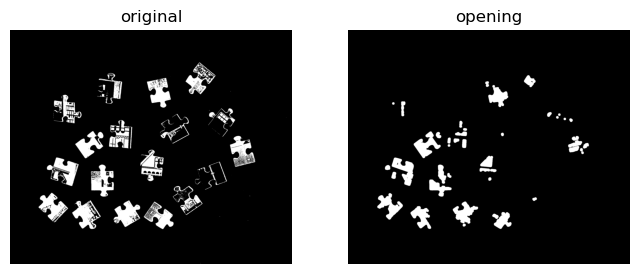

In [21]:
footprint = disk(10)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


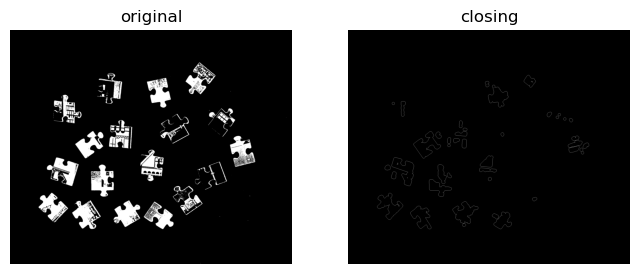

In [22]:
outline = compute_outline(opened)
plot_comparison(bin_img, outline, 'closing')